In [15]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from lxmls.readers.pos_corpus import PostagCorpusData
data = PostagCorpusData()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
from lxmls.deep_learning.numpy_models.rnn import NumpyRNN
model = NumpyRNN(
    input_size=data.input_size,
    embedding_size=50,
    hidden_size=20,
    output_size=data.output_size,
    learning_rate=0.1
)

In [20]:
from lxmls.deep_learning.rnn import get_rnn_parameter_handlers, get_rnn_loss_range

get_parameter, set_parameter = get_rnn_parameter_handlers(
    layer_index=-1,
    row=0,
    column=0
)

In [77]:
batch = data.batches('train', batch_size=1)[0]

current_loss = model.cross_entropy_loss(batch['input'], batch['output'])
current_weight = get_parameter(model.parameters)

weight_range, loss_range = get_rnn_loss_range(model, get_parameter, set_parameter, batch)

In [84]:
gradient = model.backpropagation(batch['input'], batch['output'])
current_gradient = get_parameter(gradient)

[-0.00000000e+00 -1.59234129e+00  4.86235361e-02  7.26428228e-04
 -1.72362445e-03 -0.00000000e+00 -1.19657663e+00  8.49992936e-02
  4.00507505e-03  6.65364919e-04 -0.00000000e+00 -2.63653478e+00
  5.27922881e-02  1.68278554e-03 -3.83510388e-04 -0.00000000e+00
 -2.79803783e+00  1.03727867e-01  3.87620360e-03  9.94205661e-04
 -0.00000000e+00 -9.66668875e-01 -1.00671366e-02  1.82774946e-03
 -2.09911703e-03 -0.00000000e+00  3.68210537e-01  4.57071650e-02
  3.70339345e-03  1.06650971e-04 -0.00000000e+00  3.94172106e-02
 -5.51620457e-04  2.40382753e-03 -2.07240745e-03 -0.00000000e+00
 -5.51914686e-01  2.58546832e-02  5.46995533e-04 -1.27107250e-03
 -0.00000000e+00 -1.14981526e+00  8.50449515e-02  1.95989300e-03
 -1.42704886e-03 -0.00000000e+00 -3.71047805e+00  6.18227977e-03
 -1.79148182e-03 -2.29250067e-03 -0.00000000e+00 -2.89460732e+00
  1.56174921e-02  1.30755096e-03 -2.19152987e-03 -0.00000000e+00
 -4.45977497e-01  4.41409049e-02  2.40000122e-03 -1.33580852e-03
 -0.00000000e+00  1.28060

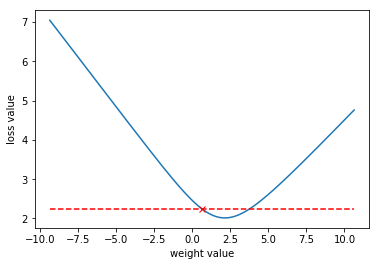

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(weight_range, loss_range)
plt.plot(current_weight, current_loss, 'xr')
plt.ylabel('loss value')
plt.xlabel('weight value')

h = plt.plot(
    weight_range,
    current_gradient*(weight_range - current_weight) + current_loss,
    'r--'
)

In [16]:
import numpy as np
import time
num_epochs = 20

train_batches = data.batches('train', batch_size=1)
dev_set = data.batches('dev', batch_size=1)
test_set = data.batches('test', batch_size=1)

In [ ]:
start = time.time()
for epoch in range(num_epochs):
    # Batch lopp
    for batch in train_batches:
        model.update(input=batch['input'], output=batch['output'])
        
        # Evaluation dep
        is_hit = []
        for batch in dev_set:
            is_hit.extend(model.predict(input=batch['input'], output=batch['output'])
            print("Epoch %d: dev accuracy %2.2f %%" % (epoch+1, accuracy))
                          